In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/insurance/insurance.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [4]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


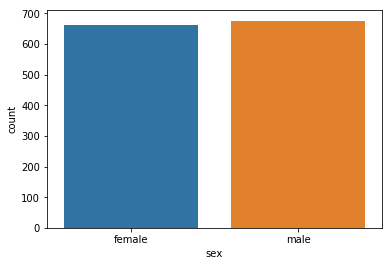

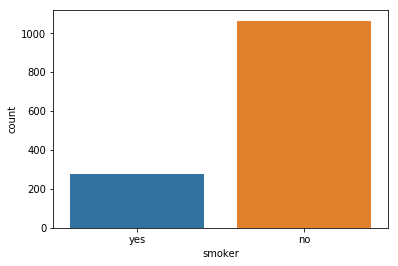

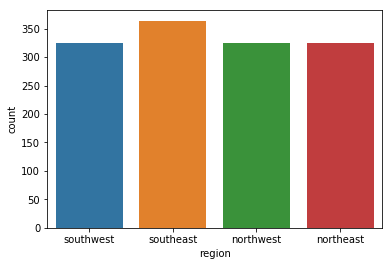

In [5]:
for i in ['sex','smoker','region']:
    sns.countplot(df[i])
    plt.show()
    

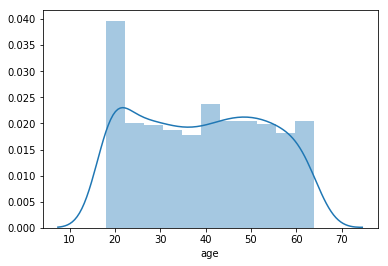

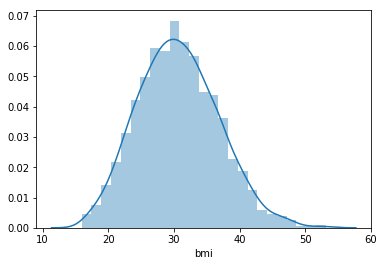

In [6]:
for i in ['age','bmi']:
    sns.distplot(df[i])
    plt.show()

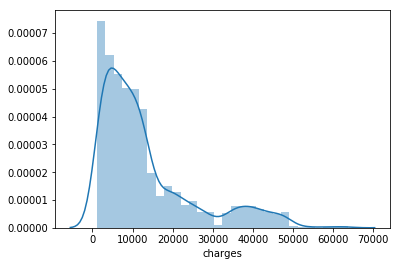

In [7]:
sns.distplot(df['charges'])

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

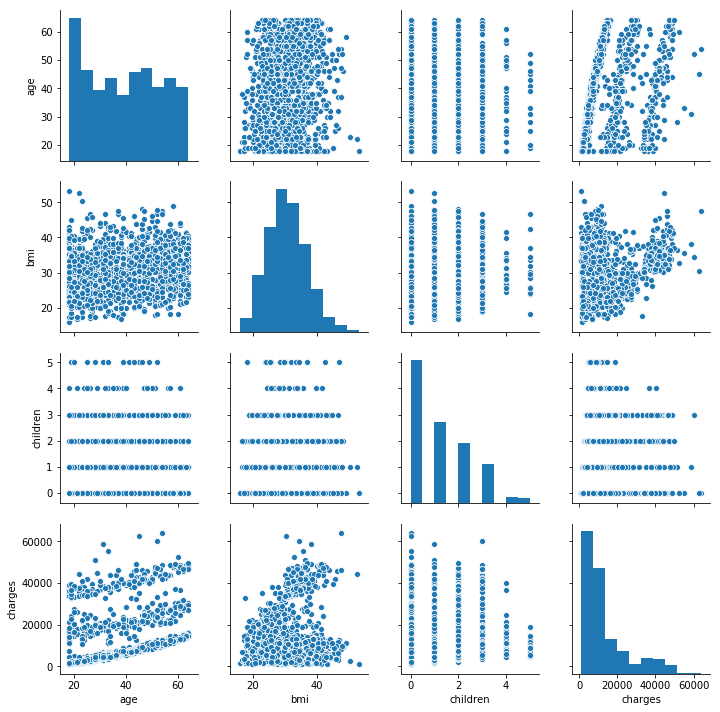

In [9]:
sns.pairplot(df)

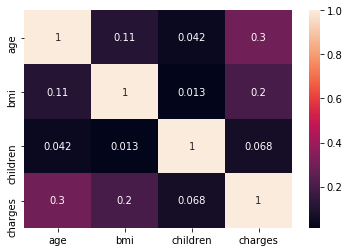

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
dfdumm=pd.get_dummies(df,drop_first=True)

In [14]:
dfdumm.drop('charges',axis=1,inplace=True)

In [15]:
dff=pd.concat([df,dfdumm],axis=1)

In [16]:
dff.drop(columns=['sex','smoker','region'],inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr=LinearRegression()

X=np.array(dff.drop('charges',axis=1))
y=np.array(dff['charges']).reshape(-1,1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070, 1)
(268, 1)


In [19]:
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [20]:
model.score(X_test,y_test)

0.7623160917397034

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7623160917397034

In [22]:
y_pred=pd.DataFrame(y_pred)

In [23]:
y_test

array([[ 1646.4297 ],
       [11353.2276 ],
       [ 8798.593  ],
       [10381.4787 ],
       [ 2103.08   ],
       [38746.3551 ],
       [ 9304.7019 ],
       [11658.11505],
       [ 3070.8087 ],
       [19539.243  ],
       [12629.8967 ],
       [11538.421  ],
       [ 6338.0756 ],
       [ 7050.642  ],
       [ 1137.4697 ],
       [ 8968.33   ],
       [21984.47061],
       [ 6414.178  ],
       [28287.89766],
       [13462.52   ],
       [ 9722.7695 ],
       [40932.4295 ],
       [ 8026.6666 ],
       [ 8444.474  ],
       [ 2203.47185],
       [ 6664.68595],
       [ 8606.2174 ],
       [ 8283.6807 ],
       [ 5375.038  ],
       [ 3645.0894 ],
       [11674.13   ],
       [11737.84884],
       [24873.3849 ],
       [33750.2918 ],
       [24180.9335 ],
       [ 9863.4718 ],
       [36837.467  ],
       [17942.106  ],
       [11856.4115 ],
       [39725.51805],
       [ 4349.462  ],
       [11743.9341 ],
       [19749.38338],
       [12347.172  ],
       [ 4931.647  ],
       [30

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

print('r2 score: ',r2_score(y_test,y_pred))

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse: ',rmse)
print('y intercept: ',lr.intercept_)
print('y coefficients: ',lr.coef_)

r2 score:  0.7623160917397034
rmse:  5956.643841135603
y intercept:  [-11260.3180609]
y coefficients:  [[ 9.72707882e+14 -1.06667572e+12  1.45204506e+11 -9.72707882e+14
   1.06667572e+12 -1.45204505e+11 -2.41249317e+02  2.37870320e+04
  -3.98275696e+02 -1.03863159e+03 -9.03174927e+02]]


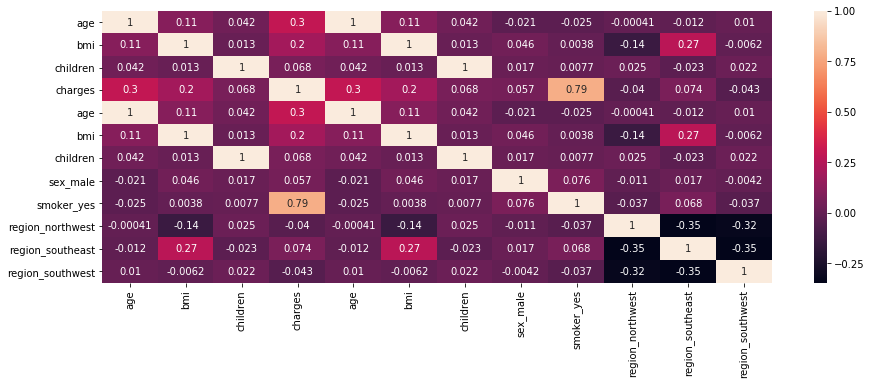

In [25]:
fig,axes=plt.subplots(figsize=(15,5))
sns.heatmap(dff.corr(),annot=True,ax=axes)
plt.show()

In [26]:
dff.corr()['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
age                 0.299008
bmi                 0.198341
children            0.067998
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

In [27]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

 ## Ridge and Lasso regression using K fold cv:

In [28]:
### normal k fold 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)

###stratified K fold
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
print(folds)

KFold(n_splits=10, random_state=None, shuffle=False)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [29]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso,Ridge

In [30]:
# param={'alpha':[0.01,0.05,0.1,0.2,0.3,0.4]}
ridge_model=Ridge()
for i in [0.01,0.05,0.1,0.2,0.3,0.4]:
    print('Ridge 10 fold results for ',i,':','\n',cross_val_score(Ridge(alpha=i), X, y,cv=10))
    print('mean of each iteration: ',np.mean(cross_val_score(Ridge(alpha=i), X, y,cv=10)))
    print('\n')

print('\n')
##Lasso using 
lasso_model=Lasso()
for i in [0.01,0.05,0.1,0.2,0.3,0.4]:
    print('Lasso 10 fold results for ',i,':','\n',cross_val_score(Lasso(alpha=i), X, y,cv=10))
    print('mean of each iteration: ',np.mean(cross_val_score(Lasso(alpha=i), X, y,cv=10)))
    print('\n')


Ridge 10 fold results for  0.01 : 
 [0.78599726 0.73250348 0.73491339 0.66881448 0.77173376 0.78401903
 0.79314296 0.6687008  0.74242163 0.76276392]
mean of each iteration:  0.7445010695491875


Ridge 10 fold results for  0.05 : 
 [0.78599043 0.73252323 0.73491694 0.66884088 0.77169908 0.78401534
 0.79313227 0.66873636 0.74240993 0.76276068]
mean of each iteration:  0.744502513328313


Ridge 10 fold results for  0.1 : 
 [0.78598183 0.73254782 0.7349213  0.66887378 0.77165569 0.78401065
 0.79311884 0.6687807  0.74239523 0.76275656]
mean of each iteration:  0.744504239496694


Ridge 10 fold results for  0.2 : 
 [0.78596437 0.73259667 0.73492974 0.66893927 0.77156879 0.78400103
 0.79309176 0.66886902 0.74236558 0.76274807]
mean of each iteration:  0.744507430508318


Ridge 10 fold results for  0.3 : 
 [0.78594659 0.73264508 0.73493783 0.66900435 0.77148172 0.78399106
 0.7930644  0.66895686 0.7423356  0.76273925]
mean of each iteration:  0.744510274008107


Ridge 10 fold results for  0.4 :

## Ridge regression using Grid search cv:

In [31]:
param={'alpha':[0.01,0.05,0.1,0.2,0.3,0.4]}
ridge_model=Ridge()

model_cv=GridSearchCV(estimator=ridge_model,param_grid=param,cv=10,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

print(model_cv.best_estimator_)

print(model_cv.best_params_)

Y_pred=model_cv.predict(X_test)
print(r2_score(y_test,Y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
{'alpha': 0.4}
0.7622859074701007


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


In [32]:
''' 
so,our best hyperparameters for passing to Ridge regression model using grid search cv is - 'alpha':0.4
which is giving us the best possible accuracy from our ridge regression model,with induced penalty of 0.4
with an accuracy of 0.7622.This simply means that ridge regression model is capable of giving of this much accuracy with changes in
hyperparameter / hyperparam variation.
We can also change the X & y,to check if accuracy changes using gridsearch CV to give us more better accuracy by dropping some unwanted 
columns which are capable of inducing multicollinearity.
'''

" \nso,our best hyperparameters for passing to Ridge regression model using grid search cv is - 'alpha':0.4\nwhich is giving us the best possible accuracy from our ridge regression model,with induced penalty of 0.4\nwith an accuracy of 0.7622.This simply means that ridge regression model is capable of giving of this much accuracy with changes in\nhyperparameter / hyperparam variation.\nWe can also change the X & y,to check if accuracy changes using gridsearch CV to give us more better accuracy by dropping some unwanted \ncolumns which are capable of inducing multicollinearity.\n"

## Lasso Regression using Grid search cv

In [33]:
param={'alpha':[0.01,0.05,0.1,0.2,0.3,0.4]}
lasso_model=Lasso()

model_cv=GridSearchCV(estimator=lasso_model,param_grid=param,cv=10,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

print(model_cv.best_estimator_)

print(model_cv.best_params_)

Y_pred=model_cv.predict(X_test)
print(r2_score(y_test,Y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
{'alpha': 0.01}
0.7623311373321502


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


In [34]:
''' 
so,our best hyperparameters for passing to lasso regression model using grid search cv is - 'alpha':0.01
which is giving us the best possible accuracy from our ridge regression model,with induced penalty of 0.01
with an accuracy of 0.7623.This simply means that ridge regression model is capable of giving of this much accuracy with changes in
hyperparameter / hyperparam variation.
We can also change the X & y,to check if accuracy changes using gridsearch CV to give us more better accuracy by dropping some unwanted 
columns which are capable of inducing multicollinearity.
'''

" \nso,our best hyperparameters for passing to lasso regression model using grid search cv is - 'alpha':0.01\nwhich is giving us the best possible accuracy from our ridge regression model,with induced penalty of 0.01\nwith an accuracy of 0.7623.This simply means that ridge regression model is capable of giving of this much accuracy with changes in\nhyperparameter / hyperparam variation.\nWe can also change the X & y,to check if accuracy changes using gridsearch CV to give us more better accuracy by dropping some unwanted \ncolumns which are capable of inducing multicollinearity.\n"